# Exploratory data analysis

In [29]:
import os
from traffic.core import Traffic, Flight
from tqdm import tqdm

In [2]:
trajectories_folder = '../datasetsV2/dataset_specific_callsigns/trajectories'

In [4]:
def extract_flights_per_runway(callsign=None):
    runway_traffic = {}
    for subfolder in os.listdir(trajectories_folder):
        subfolder_path = os.path.join(trajectories_folder, subfolder)
        if os.path.isdir(subfolder_path):
            flights = []
            for filename in os.listdir(subfolder_path):
                if callsign and callsign in filename or not callsign:
                    file_path = os.path.join(subfolder_path, filename)
                    flights.append(Flight.from_file(file_path))
            if flights:
                runway_number = ''.join(filter(str.isdigit, subfolder))
                runway_traffic[int(runway_number)] = Traffic.from_flights(flights)
    return runway_traffic

In [20]:
traffic = extract_flights_per_runway()

In [ ]:
flights_per_runway = {runway: len(df) for runway, df in traffic.items()}

total_flights = sum(flights_per_runway.values())

print("Number of flights per runway:", flights_per_runway)
print("Total number of flights:", total_flights)

Number of flights per runway: {33: 4325, 15: 101, 29: 303, 11: 2015}
Total number of flights: 6744


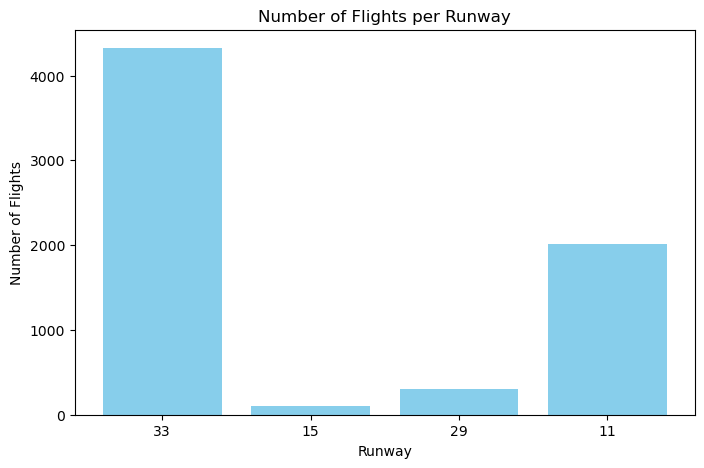

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar([str(r) for r in flights_per_runway.keys()], flights_per_runway.values(), color='skyblue')
plt.xlabel('Runway')
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Runway')
plt.xticks([str(r) for r in flights_per_runway.keys()])
plt.show()

In [ ]:
distinct_callsigns_per_runway = {}

for runway in traffic.keys():
    distinct_callsigns_count = {}
    for flight in traffic[runway]:
        callsign = flight.callsign
        if callsign not in distinct_callsigns_count:
            distinct_callsigns_count[callsign] = 0
        distinct_callsigns_count[callsign] += 1
    distinct_callsigns_per_runway[runway] = distinct_callsigns_count
        
for runway, callsigns in distinct_callsigns_per_runway.items():
    for callsign, count in sorted(callsigns.items(), key=lambda item: item[1], reverse=True):

Distinct callsigns per runway:
Runway 33: 20 distinct callsigns
  LOT3VT: 225 flights
  LOT8AU: 225 flights
  FDB1829: 225 flights
  LOT7YC: 224 flights
  LOT9PU: 222 flights
  LOT48F: 221 flights
  LOT136: 221 flights
  LOT3WJ: 220 flights
  LOT3VM: 219 flights
  LOT5MG: 219 flights
  FIN1143: 216 flights
  LOT336: 213 flights
  LOT774: 213 flights
  LOT4LE: 212 flights
  LOT3904: 211 flights
  LOT484: 211 flights
  LOT2LY: 211 flights
  KLM85R: 210 flights
  LOT318: 209 flights
  FIN8AL: 198 flights
Runway 15: 20 distinct callsigns
  KLM85R: 8 flights
  LOT3904: 6 flights
  LOT7YC: 6 flights
  LOT2LY: 6 flights
  FIN1143: 5 flights
  FIN8AL: 5 flights
  LOT3VT: 5 flights
  LOT5MG: 5 flights
  LOT3WJ: 5 flights
  LOT8AU: 5 flights
  LOT484: 5 flights
  LOT48F: 5 flights
  LOT4LE: 5 flights
  LOT336: 5 flights
  LOT136: 5 flights
  LOT3VM: 4 flights
  LOT318: 4 flights
  LOT774: 4 flights
  LOT9PU: 4 flights
  FDB1829: 4 flights
Runway 29: 20 distinct callsigns
  FIN1143: 19 flights
  

In [57]:
import plotly.graph_objects as go

callsigns = sorted({cs for runway_dict in distinct_callsigns_per_runway.values() for cs in runway_dict})
runways = list(distinct_callsigns_per_runway.keys())

# Prepare data for stacked bar plot
data = {cs: [distinct_callsigns_per_runway[runway].get(cs, 0) for runway in runways] for cs in callsigns}

fig = go.Figure()
for cs in callsigns:
    fig.add_bar(
        x=[str(r) for r in runways],
        y=data[cs],
        name=cs
    )

fig.update_layout(
    barmode='stack',
    xaxis_title='Runway',
    yaxis_title='Number of Landings',
    title='Number of Landings per Callsign on Each Runway',
    legend_title='Callsign',
    width=900,
    height=500
)
fig.show()

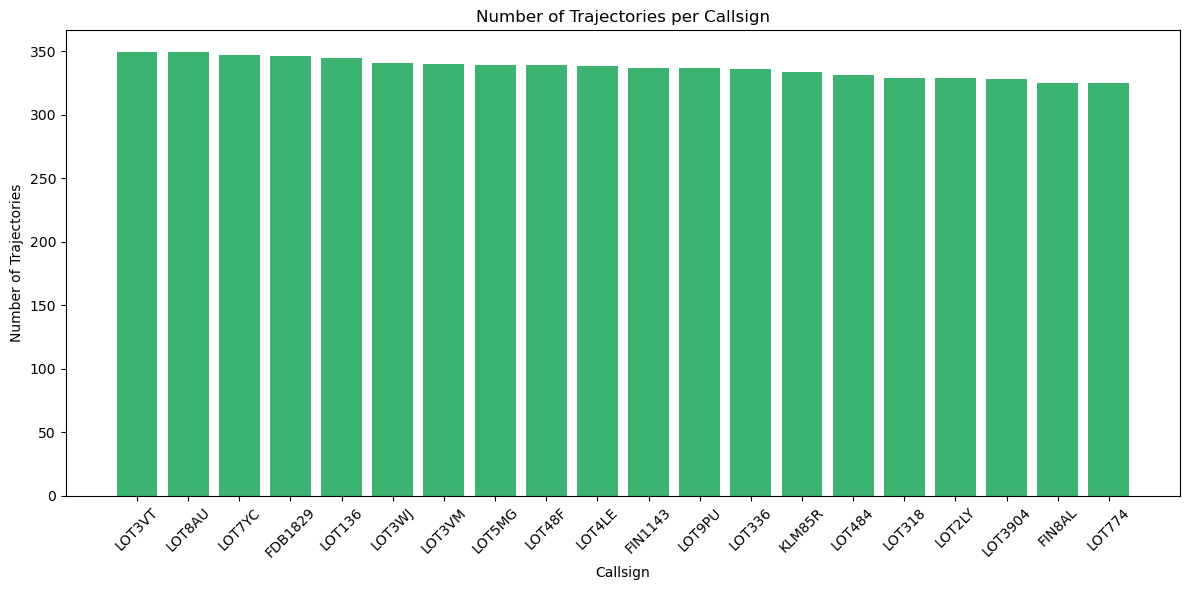

In [34]:
callsign_counts = {}

for flight in all_flights:
    cs = getattr(flight, 'callsign', None)
    if cs is not None:
        callsign_counts[cs] = callsign_counts.get(cs, 0) + 1

sorted_callsigns, sorted_counts = zip(*sorted(callsign_counts.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(12, 6))
plt.bar(sorted_callsigns, sorted_counts, color='mediumseagreen')
plt.xlabel('Callsign')
plt.ylabel('Number of Trajectories')
plt.title('Number of Trajectories per Callsign')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Enrich data with date and aircraft information

In [22]:
all_flights = []
for runway, flights in traffic.items():
    for flight in flights:
        all_flights.append(flight)
traffic = Traffic.from_flights(all_flights)

In [23]:
traffic = traffic.aircraft_data()

In [26]:
print(traffic.data['typecode'].unique())
print(f"Number of unique aircraft types: {len(traffic.data['typecode'].unique())}")

['DH8D' 'AT75' 'E190' 'A319' 'A320' 'A321' 'B738' 'B739' 'B737' 'E75L'
 'E295' 'E170' 'E75S' 'E195' 'B788' 'B789' 'B38M' 'B39M']
Number of unique aircraft types: 18


In [30]:
typecode_counts = {}

for flight in tqdm(traffic):
    typecode = getattr(flight, 'typecode', None)
    if typecode is None and hasattr(flight, 'aircraft'):
        typecode = getattr(flight.aircraft, 'typecode', None)
    if typecode is not None:
        typecode_counts[typecode] = typecode_counts.get(typecode, 0) + 1

print(typecode_counts)

100%|██████████| 6744/6744 [00:10<00:00, 623.84it/s] 

{'DH8D': 777, 'AT75': 72, 'E190': 1444, 'A319': 15, 'A320': 13, 'A321': 4, 'B738': 371, 'B739': 11, 'B737': 72, 'E75L': 19, 'E295': 54, 'E170': 332, 'E75S': 867, 'E195': 1877, 'B788': 159, 'B789': 172, 'B38M': 478, 'B39M': 7}


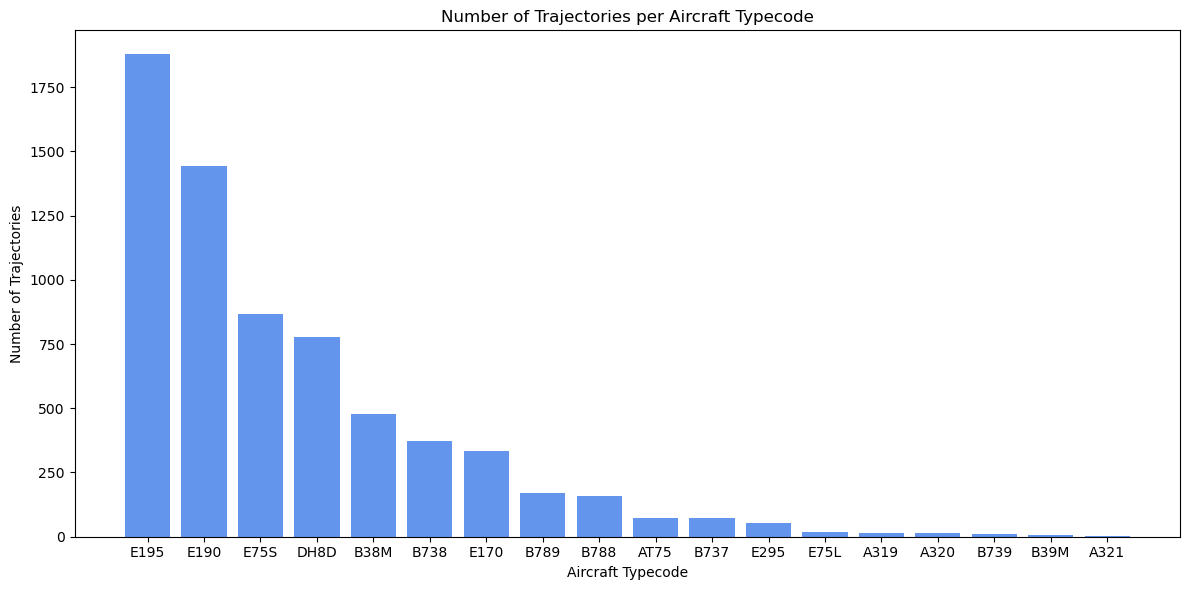

In [33]:
sorted_items = sorted(typecode_counts.items(), key=lambda item: item[1], reverse=True)
sorted_typecodes, sorted_counts = zip(*sorted_items)

plt.figure(figsize=(12, 6))
plt.bar(sorted_typecodes, sorted_counts, color='cornflowerblue')
plt.xlabel('Aircraft Typecode')
plt.ylabel('Number of Trajectories')
plt.title('Number of Trajectories per Aircraft Typecode')
plt.tight_layout()
plt.show()

In [36]:
aircraft_manufacturers = {
    'DH8D': 'De Havilland Canada',
    'AT75': 'ATR',
    'E190': 'Embraer',
    'A319': 'Airbus',
    'A320': 'Airbus',
    'A321': 'Airbus',
    'B738': 'Boeing',
    'B739': 'Boeing',
    'B737': 'Boeing',
    'E75L': 'Embraer',
    'E295': 'Embraer',
    'E170': 'Embraer',
    'E75S': 'Embraer',
    'E195': 'Embraer',
    'B788': 'Boeing',
    'B789': 'Boeing',
    'B38M': 'Boeing',
    'B39M': 'Boeing'
}

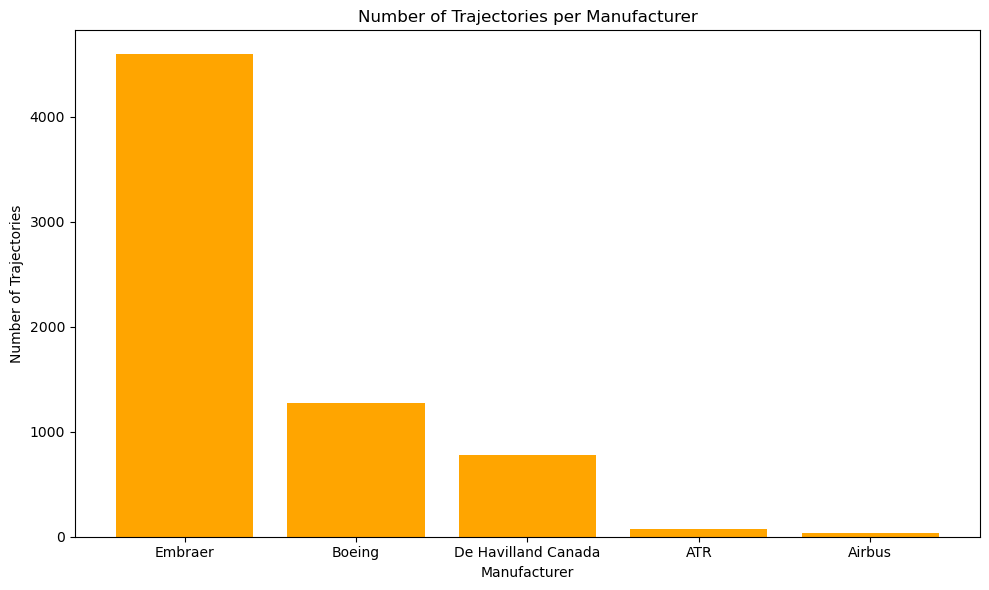

In [37]:
# Group typecode counts by manufacturer
manufacturer_counts = {}
for typecode, count in typecode_counts.items():
    manufacturer = aircraft_manufacturers.get(typecode, 'Other')
    manufacturer_counts[manufacturer] = manufacturer_counts.get(manufacturer, 0) + count

# Sort manufacturers by total count
sorted_manufacturers = sorted(manufacturer_counts.items(), key=lambda item: item[1], reverse=True)
man_names, man_counts = zip(*sorted_manufacturers)

plt.figure(figsize=(10, 6))
plt.bar(man_names, man_counts, color='orange')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Trajectories')
plt.title('Number of Trajectories per Manufacturer')
plt.tight_layout()
plt.show()

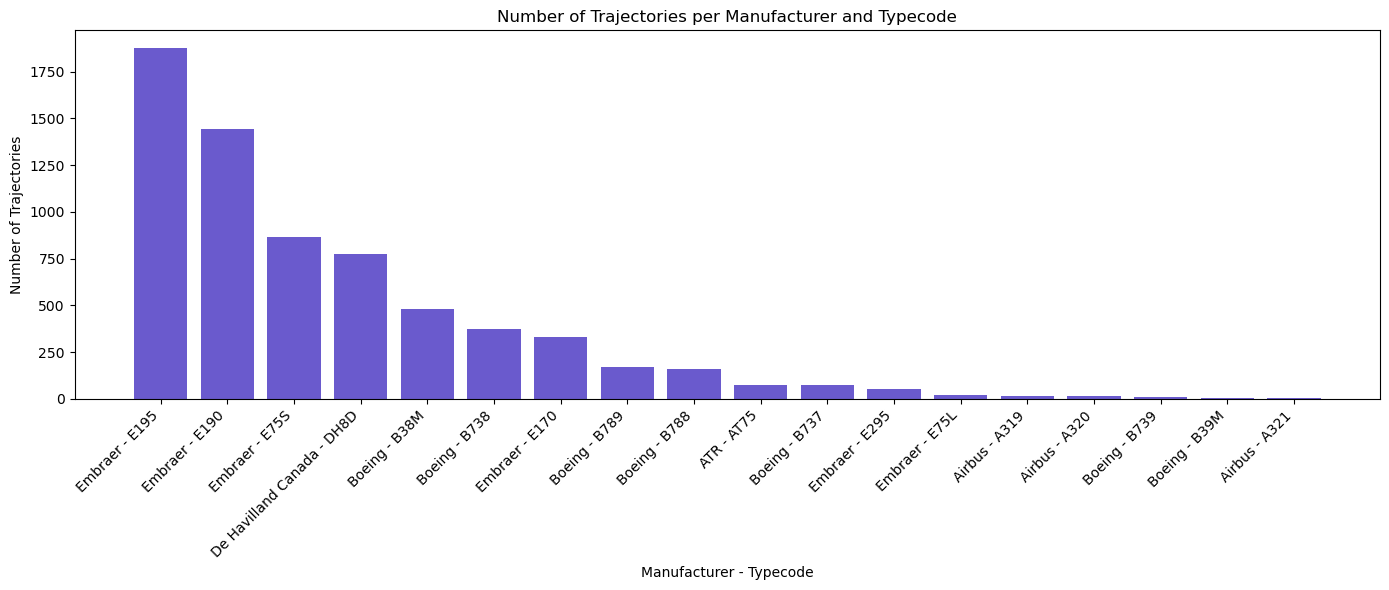

In [38]:
# Prepare data for combined manufacturer and typecode plot
labels = []
values = []
for typecode, count in sorted_items:
    manufacturer = aircraft_manufacturers.get(typecode, 'Other')
    labels.append(f"{manufacturer} - {typecode}")
    values.append(count)

plt.figure(figsize=(14, 6))
plt.bar(labels, values, color='slateblue')
plt.xlabel('Manufacturer - Typecode')
plt.ylabel('Number of Trajectories')
plt.title('Number of Trajectories per Manufacturer and Typecode')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_7175/3716046950.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20')


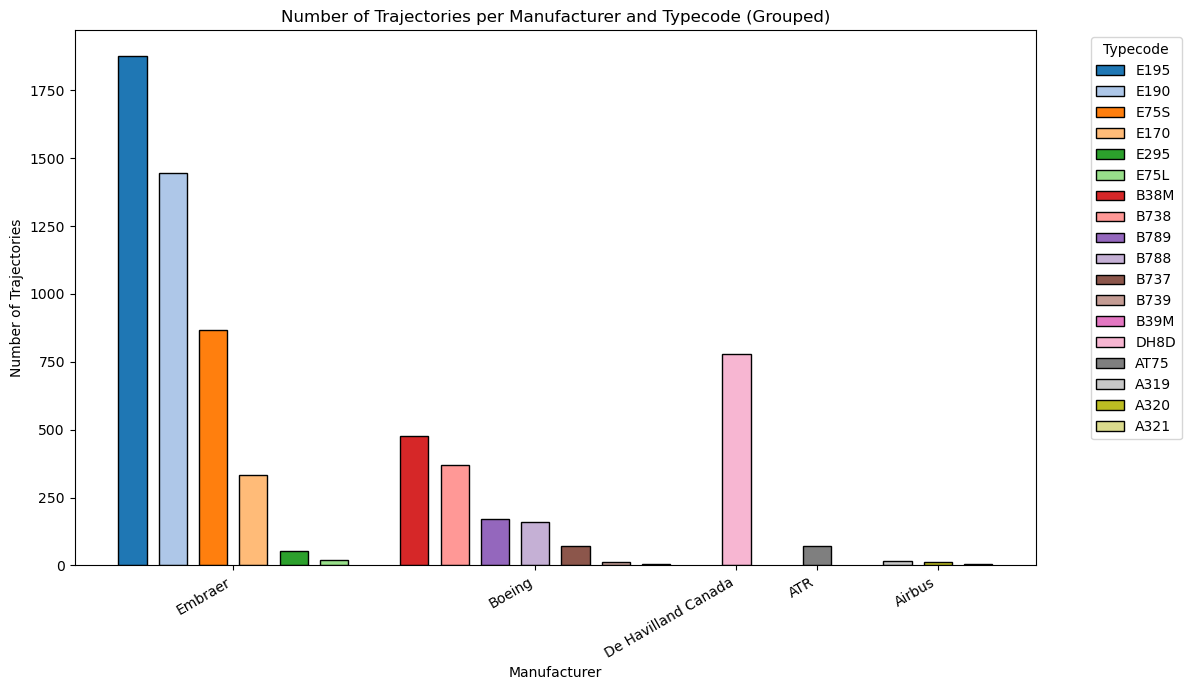

In [39]:
from matplotlib.patches import Patch

# Plot each manufacturer's typecodes as grouped bars, sorted by manufacturer total count

manufacturer_typecodes = {}
for typecode, count in typecode_counts.items():
    manufacturer = aircraft_manufacturers.get(typecode, 'Other')
    if manufacturer not in manufacturer_typecodes:
        manufacturer_typecodes[manufacturer] = []
    manufacturer_typecodes[manufacturer].append((typecode, count))

# Sort manufacturers by total count (already available as sorted_manufacturers)
plt.figure(figsize=(12, 7))
bar_width = 0.7

x_pos = []
labels = []
counts = []
colors = []
import matplotlib.cm as cm

cmap = cm.get_cmap('tab20')
color_idx = 0
xtick_pos = []
xtick_labels = []

current_x = 0
for m_idx, (manufacturer, total) in enumerate(sorted_manufacturers):
    tc_list = sorted(manufacturer_typecodes.get(manufacturer, []), key=lambda x: x[1], reverse=True)
    for typecode, count in tc_list:
        x_pos.append(current_x)
        labels.append(f"{typecode}")
        counts.append(count)
        colors.append(cmap(color_idx % 20))
        color_idx += 1
        current_x += 1
    # Mark the center for xtick
    if tc_list:
        xtick_pos.append((x_pos[-len(tc_list)] + x_pos[-1]) / 2)
        xtick_labels.append(manufacturer)
    current_x += 1  # space between manufacturers

plt.bar(x_pos, counts, color=colors, width=bar_width, edgecolor='black')
plt.xticks(xtick_pos, xtick_labels, rotation=30, ha='right')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Trajectories')
plt.title('Number of Trajectories per Manufacturer and Typecode (Grouped)')
# Add legend for typecodes
legend_elements = [Patch(facecolor=colors[i], edgecolor='black', label=labels[i]) for i in range(len(labels))]
plt.legend(handles=legend_elements, title='Typecode', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

In [42]:
distinct_icao24 = {flight.icao24 for flight in all_flights}
print(f"Number of distinct icao24: {len(distinct_icao24)}")

Number of distinct icao24: 229


In [58]:
icao24_counts = {}

for flight in all_flights:
    icao = getattr(flight, 'icao24', None)
    if icao is not None:
        icao24_counts[icao] = icao24_counts.get(icao, 0) + 1

In [50]:
icao24_to_typecode = {}

for flight in tqdm(all_flights):
    icao = getattr(flight, 'icao24', None)
    typecode = getattr(flight, 'typecode', None)
    if typecode is None and hasattr(flight, 'aircraft'):
        typecode = getattr(flight.aircraft, 'typecode', None)
    if icao is not None and typecode is not None:
        icao24_to_typecode[icao] = typecode

print(f"Number of unique icao24 mapped: {len(icao24_to_typecode)}")

100%|██████████| 6744/6744 [02:32<00:00, 44.11it/s]

Number of unique icao24 mapped: 229


In [ ]:
typecode_icao24_counts = {}
for flight in tqdm(all_flights):
    typecode = getattr(flight, 'typecode', None)
    if typecode is None and hasattr(flight, 'aircraft'):
        typecode = getattr(flight.aircraft, 'typecode', None)
    icao24 = getattr(flight, 'icao24', None)
    if typecode and icao24:
        if typecode not in typecode_icao24_counts:
            typecode_icao24_counts[typecode] = []
        typecode_icao24_counts[typecode].append((icao24, icao24_counts[icao24]))

In [56]:
import plotly.graph_objects as go

# Prepare x-axis labels (manufacturer + typecode)
x_labels = []
typecode_to_x = {}
for manufacturer, _ in sorted_manufacturers:
    tc_list = sorted(manufacturer_typecodes.get(manufacturer, []), key=lambda x: x[1], reverse=True)
    for typecode, _ in tc_list:
        label = f"{manufacturer}<br>{typecode}"
        x_labels.append(label)
        typecode_to_x[typecode] = label

# Prepare all ICAO24s to plot (limit to top N for readability)
all_icao24 = set()
for tc, icao24_list in typecode_icao24_counts.items():
    for icao24, _ in icao24_list:
        all_icao24.add(icao24)
# Optionally, limit to top N ICAO24s by total count
icao24_total_counts = {icao24: sum(count for tc_list in typecode_icao24_counts.values() for i24, count in tc_list if i24 == icao24) for icao24 in all_icao24}
top_icao24 = [icao for icao, _ in sorted(icao24_total_counts.items(), key=lambda x: x[1], reverse=True)]

# Prepare traces for each ICAO24
traces = []
for icao24 in top_icao24:
    y = []
    for typecode in typecode_to_x:
        # Find count for this icao24 and typecode
        count = 0
        for i24, c in typecode_icao24_counts.get(typecode, []):
            if i24 == icao24:
                count = c
                break
        y.append(count)
    traces.append(go.Bar(
        x=[typecode_to_x[tc] for tc in typecode_to_x],
        y=y,
        name=icao24,
        hoverinfo='x+y+name'
    ))

fig = go.Figure(data=traces)
fig.update_layout(
    barmode='stack',
    width=1400,
    height=600,
    title='Number of Trajectories per Aircraft Typecode (Stacked by ICAO24)',
    xaxis=dict(
        title='Manufacturer / Typecode',
        tickangle=30,
        tickvals=x_labels,
        ticktext=x_labels
    ),
    yaxis=dict(title='Number of Trajectories'),
    legend_title='ICAO24'
)
fig.show()


In [62]:
callsign_to_typecode_counts = {}

for flight in tqdm(traffic):
    callsign = getattr(flight, 'callsign', None)
    typecode = getattr(flight, 'typecode', None)
    if typecode is None and hasattr(flight, 'aircraft'):
        typecode = getattr(flight.aircraft, 'typecode', None)
    if callsign and typecode:
        if callsign not in callsign_to_typecode_counts:
            callsign_to_typecode_counts[callsign] = {}
        if typecode not in callsign_to_typecode_counts[callsign]:
            callsign_to_typecode_counts[callsign][typecode] = 0
        callsign_to_typecode_counts[callsign][typecode] += 1

100%|██████████| 6744/6744 [00:11<00:00, 562.49it/s] 


In [66]:
from plotly.colors import qualitative

import plotly.graph_objects as go
import plotly.express as px

# Use a larger color palette
colors = qualitative.Alphabet  # 26 unique colors
color_map = {tc: colors[i % len(colors)] for i, tc in enumerate(typecodes)}

fig = go.Figure()
for i, tc in enumerate(typecodes):
    fig.add_bar(
        x=callsigns,
        y=data[tc],
        name=tc,
        marker_color=color_map[tc]
    )

fig.update_layout(
    barmode='stack',
    xaxis_title='Callsign',
    yaxis_title='Number of Trajectories',
    title='Number of Trajectories per Callsign (Stacked by Aircraft Typecode)',
    legend_title='Typecode',
    width=1200,
    height=500
)
fig.show()


In [69]:
callsign_to_icao24_counts = {}

for flight in tqdm(traffic):
    callsign = getattr(flight, 'callsign', None)
    icao24 = getattr(flight, 'icao24', None)
    if callsign and icao24:
        if callsign not in callsign_to_icao24_counts:
            callsign_to_icao24_counts[callsign] = {}
        if icao24 not in callsign_to_icao24_counts[callsign]:
            callsign_to_icao24_counts[callsign][icao24] = 0
        callsign_to_icao24_counts[callsign][icao24] += 1

100%|██████████| 6744/6744 [00:12<00:00, 555.32it/s]


In [70]:
from plotly.colors import qualitative

callsigns = list(callsign_to_icao24_counts.keys())
icao24s = sorted({icao for cs_dict in callsign_to_icao24_counts.values() for icao in cs_dict})

colors = qualitative.Alphabet  # 26 unique colors
color_map = {icao: colors[i % len(colors)] for i, icao in enumerate(icao24s)}

fig = go.Figure()
for i, icao in enumerate(icao24s):
    y = [callsign_to_icao24_counts[cs].get(icao, 0) for cs in callsigns]
    fig.add_bar(
        x=callsigns,
        y=y,
        name=icao,
        marker_color=color_map[icao]
    )

fig.update_layout(
    barmode='stack',
    xaxis_title='Callsign',
    yaxis_title='Number of Trajectories',
    title='Number of Trajectories per Callsign (Stacked by ICAO24)',
    legend_title='ICAO24',
    width=1200,
    height=500
)
fig.show()